## Data Analytics for Human Activity Recognition using Smartphone Sensors

In [48]:
import pandas as pd
import numpy as np
import json
from collections import Counter

import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly.colors import n_colors

from IPython.core.display import display, HTML, Javascript 
import IPython.display
from IPython.display import display, clear_output

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("kaggle_survey_2022_responses.csv")

In [50]:
df.head(5)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [51]:
questions_titles =  df[0:1]

In [52]:
df = df[1:]

In [53]:
def create_scatter_plot(
    x_axis_values,
    y_axis_values, 
    hover_template,
    marker_color, 
    marker_size, 
    title,
    subtitle,
    subtitle_explain):
    """It creates a Scatter Plot."""
    
    # Define the trace
    trace = go.Scatter(
        x=x_axis_values, 
        y=y_axis_values,
        mode='markers', 
        hovertemplate=hover_template,
        marker=dict(
            color=marker_color,
            size=marker_size,
            showscale=True,
            colorbar=dict(title="Percent"),
            opacity=0.7,
            colorscale = 'RdBu_r'
        )
    )

    # Define the layout
    layout = go.Layout(
        width=900, 
        height=950, 
        plot_bgcolor="#fff", 
        paper_bgcolor="#fff", 
        showlegend = False, 
        title = {
            'text' : f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span><br><br><sup>{subtitle}</sup><br><sup>{subtitle_explain}</sup>", 
            'x':0.5,
            'xanchor': 'center'
        }, 
        font = {"color" : '#7b6b59'},
        margin = dict(t=170),
    )
    
    fig = go.Figure(data = [trace], layout = layout)
    
    fig.update_xaxes(
        showline=False,
        linewidth=1,
        linecolor='#c9c4c3',
        gridcolor='#c9c4c3',
        tickfont=dict(size=14, family='Verdana', color='#7b6b59'), 
        title="",
        title_font=dict(size=14, family='Verdana', color='#f57369'),
        showgrid=False, 
        tickangle=325
    )
    fig.update_yaxes(
        showline=False,
        linewidth=1,
        linecolor='#000',
        gridcolor='#fff',
        tickfont=dict(size=14, family='Verdana', color='#a43725'), 
        title="",
        title_font=dict(size=14, family='Verdana', color='#f57369'),
        showgrid=False
    )

    fig.show()


In [54]:
def get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation="h"):
    """It creates the trace for a bar plot."""
    
    trace = go.Bar(
        y = y_values,
        x = x_values,
        name = "",
        orientation = orientation,
        marker = dict(color = ["#E6b6a4"]*rest_n +  ["#a43725"]*top_n),
        text = display_text,
        texttemplate =  "<b style='color: #fff'>%{text}% </b>",
        textposition = ["outside"]*rest_n + ["inside"]*top_n,
        hovertext=hovertext
    )
    
    return trace


In [55]:
def create_single_bar_plot(x_values, y_values, display_text, top_n, rest_n, hovertext, title, subtitle="", orientation="h"):
    """It creates single bar plots."""

    trace = get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation)

    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"
    
    layout = dict(
        title = large_title_format,
        font = dict(color = '#7b6b59'),
        margin = dict(t=120),
        yaxis={'categoryorder':'array','categoryarray': x_values},
        xaxis=dict(side="top", zerolinecolor = "#4d4d4d", zerolinewidth = 0.5, gridcolor="#e7e7e7", tickformat=",.1%"),
        width = 800,
        height= 700,
        plot_bgcolor = "white"
    )

    fig = go.Figure(data = trace, layout = layout)
    fig.show()
    

In [56]:
def create_box_plot(df, x_column_name, y_column_name, title):
    """It creates bar plots."""

    fig = px.box(
        df, 
        x=x_column_name, 
        y=y_column_name,
        title=f"<span style='font-size:30px; color:#7b6b59; font-family:Times New Roman'>{title}</span>")

    layout = go.Layout(
        xaxis= {"title": ""},
        yaxis= {"title": "Compensation in USD"},
        font = dict(color = 'black'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        height=800,
        width=1050
    )

    fig.update_layout(layout)
    fig.update_yaxes(showline=True, linewidth=1, gridcolor='lightgrey')
    fig.update_traces(marker_color='#b39a74')

    fig.show() 

In [57]:
def create_heatmap(z, x, y, annotation_text, color_scale, title, subtitle="", xlabel="", ylabel=""):
    """It creates a heatmap."""

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=annotation_text,  colorscale=color_scale)

    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"
    small_title_format = f"<span style='font-size:14px; font-family:Helvetica'>{subtitle}</b></span>"


    layout = dict(
        title = large_title_format + "<br>" + small_title_format,
        font = dict(color = '#7b6b59'),
         xaxis= {"title": xlabel},
        yaxis= {"title": ylabel},

    )

    fig['layout'].update(layout)
    fig["layout"]["xaxis"].update(side="bottom")
    fig.show()

In [58]:
map_ml_adoption = {
    "No (we do not use ML methods)": "Not Started" , 
    "We are exploring ML methods (and may one day put a model into production)": "Exploration Stage",
    "We use ML methods for generating insights (but do not put working models into production)": "Generating Insights", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "Models in Production",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "Models in Production",
    "I do not know": "Not Known",
    np.nan: "Not Known"
}

In [59]:
# Colors for different Machine Learning Adoption Stages
ml_adoption_color_discrete_map={
    "Models in Production":"#a43725", 
    "Generating Insights": "#c07156", 
    "Exploration Stage":"#E6b6a4",
    "Not Started": "#e0d5bd",
    "Not Known": "#beb29e"
}

In [60]:
# Rephrasing the ML Adoption (state) by adding numbers for sorting them alphabetically
map_ml_usage = {
    "No (we do not use ML methods)": "0. Not Started<br><sup>(No ML)</sup>" , 
    "We are exploring ML methods (and may one day put a model into production)": "1. Exploration<br><sup>Only Exploring ML</sup>",
    "We use ML methods for generating insights (but do not put working models into production)": "2. Beginner Stage<br><sup>Use ML only for Insights</sup>", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "3. Intermediate Stage<br><sup>Recently Started Using ML</sup>",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "4. Advance Stage<br><sup>Well Established ML</sup>",
    "I do not know": "Not Known",
    np.nan: "Not Known"   
}


In [61]:
# Rephrasing the Company Size by adding numbers for sorting them alphabetically
map_company_size = {
    "0-49 employees": "1. 0-49 employees" , 
    "50-249 employees": "2. 50-249 employees",
    "250-999 employees": "3. 250-999 employees",
    "1000-9,999 employees": "4. 1000-9,999 employees",
    "10,000 or more employees": "5. 10,000 or more employees",
    np.nan: np.nan   
}


In [62]:
# Rephrasing the Coding experience by adding numbers for sorting them alphabetically
map_programming_experience = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: np.nan
}

In [63]:
# Rephrasing the Machine Learning experience by adding numbers for sorting them alphabetically
map_ml_experience = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-2 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    np.nan: np.nan
}


In [64]:
# Rephrasing the Data Science Teams Size by adding numbers for sorting them alphabetically
map_data_team_size = {
    "0": "1. 0",
    "1-2": "2. 1-2",
    "3-4": "3. 3-4",
    "5-9": "4. 5-9",
    "10-14": "5. 10-14",
    "15-19": "6. 15-19",
    "20+": "7. 20+",
    np.nan: np.nan
}

In [65]:
# Get a plotly Dataset with all the countries along with the continent in which they belong
countries_df = px.data.gapminder().query("year == 2007")
countries_df["country"] = countries_df["country"].str.strip()

map_country_continent = {
    "United States of America": "Americas", 
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "South Korea": "Asia", 
    "Russia": "Europe",
    "Viet Nam": "Asia",
    "Hong Kong (S.A.R.)": "Asia",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "Iran, Islamic Republic of...": "Asia",
    
}

In [66]:
def fix_map_country_continent(map_countries: dict, country:str, continent:str):
    """It maps a country to its continent"""
    if country in map_countries:
        return map_countries[country]
    
    return continent

In [67]:
def usage_of_a_product_or_service(question_title: str, row: pd.Series, columns_list: list) -> str:
    """It takes as input a question title with multiple choices answers and checks
    if the respondent has selected at least one of the answers or not. 
    For instance, if we want to check if a respondent uses cloud computing platforms, question 31, then we should 
    check if the participant has selected any cloud computing platform choice Q31_1, Q31_2, etc. 
    """
    for col in columns_list:
        if col.startswith(question_title):

            if not pd.isnull(row[col]) and row[col].strip().lower() != "none":
                return "Yes"
    # If all the columns (choices), Q31_1, Q31_2, etc have empty values then the user hasn't selected 
    # any platform so we return NO as the answer
    return "No"

In [68]:
def categorize_education(education:str) -> str:
    """Assigns more general categories to education levels."""
    if education in [
        "No formal education past high school", 
        "Some college/university study without earning a bachelor’s degree"
    ]:
        return "Lower than Bachelor"
    
    if education == "Bachelor’s degree":
        return "Bachelor"
    
    if education == "Master’s degree":
        return "Master"
    
    if education in ["Doctoral degree", "Professional doctorate"]:
        return "Higher than Master"
    
    return "Other"

In [69]:
def extract_and_count_all_the_multiple_choice_answers(question, df):
    """If we have a question with multiple choices it returns a data
    frame with the number of occurrences of each choice in the responses. 
    """
    
    # e.g List of choices for Question, e.g. Q19 (computer vision methods)
    choices_list = [choice for choice in df.columns if choice.startswith(question)]
    dfs_list = []
    for col in choices_list:
        dfs_list.append(df.groupby([col]).agg({"Q2" : "count"}).reset_index().rename(columns={col: question, "Q2": "counts"}))

    agg_df = pd.concat(dfs_list)
    agg_df["relative_percent"] = agg_df.apply(lambda x : (x["counts"] / df.shape[0]), axis = 1)
    agg_df = agg_df.sort_values(by=["relative_percent"], ascending=True)
    
    return agg_df



In [70]:
def assign_label(service:str):
    """It returns the company name to which the product belongs. 
    It takes care only of the 3 big techs: Google, Microsoft, Amazon.
    """
    
    if "google" in service.lower():
        return "Google"
    
    if "aws" in service.lower() or "amazon" in service.lower():
        return "Amazon"
    
    if "azure" in service.lower() or "microsoft" in service.lower():
        return "Microsoft"
    
    if "ibm" in service.lower():
        return "IBM"

    return "Other"

In [71]:
def extract_the_number_of_responses(question_title: str, row: pd.Series, columns_list: list) -> str:
    """It takes as input an answer from a multiple-choice question and counts the number 
    of respondents that have chosen it.
    """
    num_responses = 0 
    for col in columns_list:
        if col.startswith(question_title):
            if not pd.isnull(row[col]):
                num_responses = num_responses + 1 

    return num_responses


In [72]:
def wrap_df_text(df):
    return display(HTML(df.style.background_gradient(axis=0,  cmap='YlOrBr', subset=["Average number of selected choices"]).to_html().replace("\\n","<br>")))

In [73]:
scope_df = df[
    (df["Q5"] == "No") & 
    (df["Q24"].notnull()) &
    (df["Q23"] != "Currently not employed")
]


In [74]:
scope_df = df[
    (df["Q5"] == "No") & 
    (df["Q24"].notnull()) &
    (df["Q23"] != "Currently not employed")
]


# Assign more general categories to the state of Machine Learning Adoption in industry
scope_df["ML_adoption_class"] = scope_df["Q27"].apply(lambda x : map_ml_adoption[x])

# Rephrasing the ML Adoption (state) by adding numbers for sorting them alphabetically
scope_df["ML_adoption"] = scope_df["Q27"].apply(lambda x : map_ml_usage[x])

# Rephrasing the size of the company by adding numbers for sorting them alphabetically
scope_df["Q25"] = scope_df["Q25"].apply(lambda x : map_company_size[x])

# Check if the respondent used Cloud Computing Platforms
scope_df["Cloud_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q31", row, list(scope_df.columns)), axis=1)
scope_df["NLP_methods_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q20", row, list(scope_df.columns)), axis=1)
scope_df["CV_methods_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q19", row, list(scope_df.columns)), axis=1)
scope_df["GPU_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q42", row, list(scope_df.columns)), axis=1)


scope_df["Q11"] = scope_df["Q11"].apply(lambda x : map_programming_experience[x])
scope_df["Q16"] = scope_df["Q16"].apply(lambda x : map_ml_experience[x])
scope_df["Q26"] = scope_df["Q26"].apply(lambda x : map_data_team_size[x])

industry_totals = scope_df["Q24"].value_counts().to_dict()

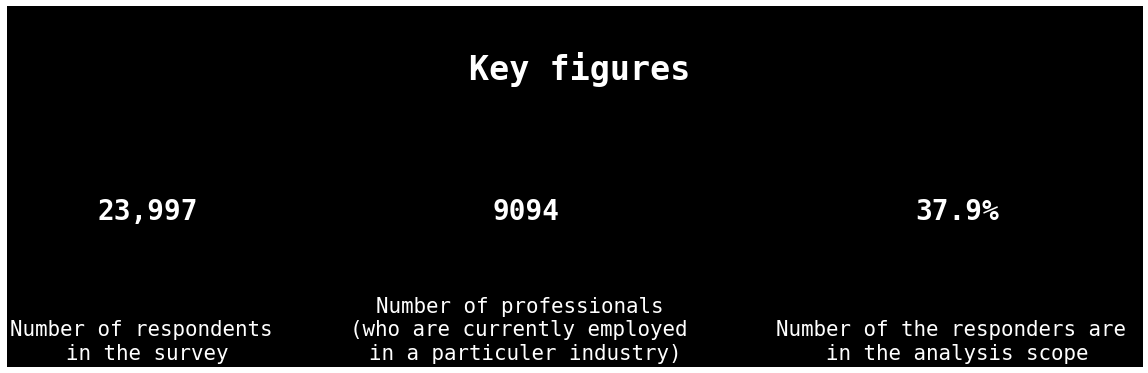

In [75]:
mpl.rcParams.update(mpl.rcParamsDefault)

fig1 = plt.figure(figsize=(6,5),facecolor='white')


ax1 = fig1.add_subplot(1,1,1)
font = 'monospace'
ax1.text(0.8, 0.8, "Key figures",color='white',fontsize=24, fontweight='bold', fontfamily=font, ha='center')


ax1.text(0, 0.4, "{:,d}".format(df.shape[0]), color='white', fontsize=20, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0, 0.001, "Number of respondents \nin the survey",color='white',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax1.text(0.7, 0.4, "{}".format(scope_df.shape[0]), color='white', fontsize=20, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0.7, 0.001, "Number of professionals \n(who are currently employed \nin a particuler industry)",color='white',fontsize=15, fontweight='light', fontfamily=font,ha='center')


ax1.text(1.5, 0.4, "{}".format(round((scope_df.shape[0]/df.shape[0] )*100, 2))+"%", color='white', fontsize=20, fontweight='bold', fontfamily=font, ha='center')
ax1.text(1.5, 0.001, "Number of the responders are \nin the analysis scope",color='white',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax1.set_yticklabels('')
ax1.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=0)
ax1.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(8)
fig1.patch.set_edgecolor('white')
fig1.patch.set_facecolor('black')
ax1.set_facecolor('black')
    

plt.show()

In [76]:
multiple_choice_questions = {}
seen_columns = []

for col in df.columns:
    question = col.split("_")[0]
    if question in seen_columns:
        if question not in multiple_choice_questions:
            multiple_choice_questions[question] = 2
        else: 
            multiple_choice_questions[question] = multiple_choice_questions[question] + 1
    else:
        seen_columns.append(question)

# Create a new column in the dataframe for each of the multiple-choice questions which
# shows the number of the choices that the respondent selected for each one respectively.
for col in list(multiple_choice_questions.keys()):
    scope_df[f"{col}_number_of_responses"] = scope_df.apply(
        lambda x : extract_the_number_of_responses(col,x, df.columns), axis = 1)
    

In [77]:
respondents_mean_responses = scope_df[[f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())]].mean(axis = 1).reset_index().rename(columns={0: "Mean number of responses"})
#respondents_mean_responses["Mean number of responses"].mean()
# (respondents_mean_responses[
#     respondents_mean_responses["Mean number of responses"] > 3
# ].shape[0]/scope_df.shape[0])*100

outliers = scope_df.filter(items=respondents_mean_responses[respondents_mean_responses["Mean number of responses"] > 3]["index"].to_list(), axis=0)
outliers = outliers.groupby(
    ["Q16"]
).agg(
    {"Q2" : "count"}
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q16": "Years of Machine Learning Experience"}
).sort_values(by=["Years of Machine Learning Experience"])
outliers["%"] = outliers.apply(lambda x : x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis = 1)
outliers["%"] = np.round(outliers["%"]* 100, 2)
outliers.style.background_gradient(axis=0,  cmap='YlGn', subset=["%"])

,Years of Machine Learning Experience,Nbr of respondents,%
0,2. < 1 years,11,6.400000
1,3. 1-2 years,28,16.280000
2,4. 2-3 years,32,18.600000
3,5. 3-4 years,23,13.370000
4,6. 4-5 years,24,13.950000
5,7. 5-10 years,43,25.000000
6,8. 10-20 years,11,6.400000


In [78]:
outliers = scope_df.filter(items=respondents_mean_responses[respondents_mean_responses["Mean number of responses"] > 3]["index"].to_list(), axis=0)
outliers = outliers.groupby(
    ["Q11"]
).agg(
    {"Q2" : "count"}
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q11": "Years of Coding Experience"}
).sort_values(by=["Years of Coding Experience"])
outliers["%"] = outliers.apply(lambda x : x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis = 1)
outliers["%"] = np.round(outliers["%"]* 100, 2)
outliers.style.background_gradient(axis=0,  cmap='YlGn', subset=["%"])

,Years of Coding Experience,Nbr of respondents,%
0,2. < 1 years,10,5.810000
1,3. 1-3 years,31,18.020000
2,4. 3-5 years,25,14.530000
3,5. 5-10 years,45,26.160000
4,6. 10-20 years,36,20.930000
5,7. 20+ years,25,14.530000


In [79]:
outlier_analysis = []

for col in list(multiple_choice_questions.keys()):
    mean_responses = round(scope_df[f"{col}_number_of_responses"].mean())
    outlier_analysis.append([
        col,
        multiple_choice_questions[col], 
        mean_responses,
    ])
    
average_responses = pd.DataFrame(outlier_analysis, columns = ["Question", "Nbr of available Choices", "Average number of selected choices"])
average_responses["Question Title"] = questions_titles[[f"{col}_1" for col in list(multiple_choice_questions.keys())]].loc[0].to_list()
average_responses["Question Title"] = average_responses["Question Title"].apply(lambda x : x.split("(Select")[0].strip())

#Updates the DataFrame in place
scope_df.drop([f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())], axis = 1, inplace=True)

average_responses["Question Title"] = average_responses['Question Title'].str.wrap(80)
average_responses = average_responses[["Question", "Question Title", "Nbr of available Choices", "Average number of selected choices"]]
wrap_df_text(average_responses)

,Question,Question Title,Nbr of available Choices,Average number of selected choices
0,Q6,On which platforms have you begun or completed data science courses?,12,2
1,Q7,What products or platforms did you find to be most helpful when you first started studying data science?,7,2
2,Q10,"Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)",3,0
3,Q12,What programming languages do you use on a regular basis?,15,2
4,Q13,Which of the following integrated development environments (IDE's) do you use on a regular basis?,14,3
5,Q14,Do you use any of the following hosted notebook products?,16,1
6,Q15,Do you use any of the following data visualization libraries on a regular basis?,15,2
7,Q17,Which of the following machine learning frameworks do you use on a regular basis?,15,2
8,Q18,Which of the following ML algorithms do you use on a regular basis?,14,3
9,Q19,Which categories of computer vision methods do you use on a regular basis?,8,1


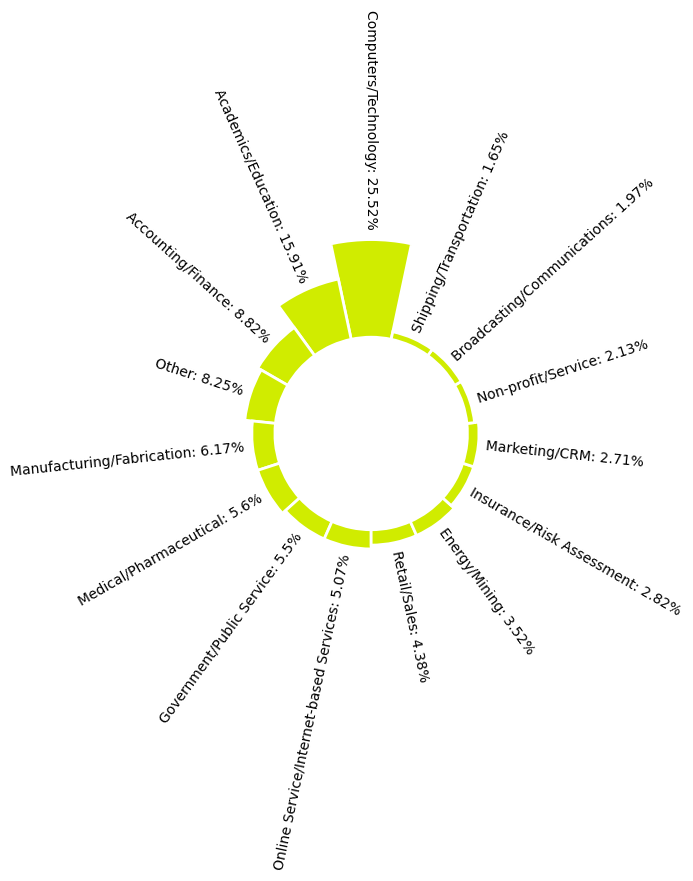

In [80]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
     #   alignment = "left"
        alignment = "right"
        rotation = rotation + 180
    else: 
     #   alignment = "left"
        alignment = "left"
    return rotation, alignment


def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 8
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle 
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)
        y = value + padding
        # And finally add the text
        ax.text(
            x=angle, 
            y=y, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",

        ) 


ANGLES = np.linspace(0, 2 * np.pi, scope_df["Q24"].nunique(), endpoint=False)
VALUES = np.round(scope_df["Q24"].value_counts(normalize=True).values, 2)*400
LABELS = scope_df["Q24"].value_counts().index


# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#D0EC00", edgecolor="white"
)

final_labels = []
test = list(np.round(scope_df["Q24"].value_counts(normalize=True).values*100,2))
count = 0 
for label in LABELS:
    final_labels.append(f"{label}: {test[count]}%")
    count = count+ 1
np.array(final_labels)

# Add labels
add_labels(ANGLES, VALUES, final_labels, OFFSET, ax)
plt.show() 

In [81]:
ml_adoption = scope_df.groupby(
    ["ML_adoption_class", "ML_adoption"]
).agg(
    {"Q2" : "count"}
).reset_index().rename(
    columns={"Q2": "counts"}
)

## First Plot
fig = go.Figure(data=[go.Pie(
    labels=scope_df["ML_adoption_class"].value_counts().index.to_list(), 
    values=list(scope_df["ML_adoption_class"].value_counts().values),
    hole=.4
)])

fig.update_traces(marker=dict(colors=['#a43725', '#e0d5bd', '#beb29e', '#E6b6a4', '#c07156']))

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>The State of the ML Adoption in Inudstry in 2022</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + "<br>" + small_title_format,
    font = dict(color = '#7b6b59'),
    showlegend = True,
    margin = dict(t=80,pad=0),

)
fig["layout"].update(layout)

fig.show()

## Second Plot
fig = px.sunburst(
    ml_adoption, 
    path=["ML_adoption_class", "ML_adoption"], 
    values="counts", 
    color="ML_adoption_class",
    color_discrete_map=ml_adoption_color_discrete_map
)

layout = dict(
    showlegend = False,
    margin = dict(t=80,pad=0, l=0),

)
fig["layout"].update(layout)

fig.show()

In [82]:
# Get the counts of occurrences of each industry
ai_adoption_totals = scope_df["Q24"].value_counts().to_dict()

# Get the counts of occurrences of each ML adoption stage per industry
ai_adoption = scope_df.groupby(["Q24", "ML_adoption"]).agg({"Q2" : "count"}).reset_index().rename(columns={"Q2": "counts"})

# Get the relative percent 
ai_adoption["relative_percent"] = ai_adoption.apply(lambda x : x["counts"] / ai_adoption_totals[x["Q24"]], axis = 1)

# Ignore categories and states like other, not known, etc. 
ai_adoption = ai_adoption[ai_adoption["ML_adoption"]!= "Not Known"]

hover_template = "Industry: %{x}<br>" + "AI Adoption Stage: %{y}<br>" + "Percentage: %{marker.size:,}" + "<extra></extra>"

create_scatter_plot(
    ai_adoption["Q24"],
    ai_adoption["ML_adoption"].apply(lambda x : x.split(".")[-1]), 
    hover_template,
    ai_adoption['relative_percent']*100, 
    ai_adoption['relative_percent']*100, 
    "Machine Learning Adoption across Industries",
    "Responses to Industry (Q24) and Machine Learning Adoption State (Q27) questions",
    "The size and color of the circles on the plot represent the percentage of respondents in each industry who chose a specific machine learning <br> adoption stage. This percentage is calculated as the number of respondents in that industry who chose the specific <br> adoption stage divided by the total number of respondents in that industry."
)

In [83]:
adoption_per_company_size = scope_df.groupby(["Q25", "ML_adoption_class"]).size().reset_index(name='counts')

fig = go.Figure()

for class_name in adoption_per_company_size["ML_adoption_class"].unique():
    fig.add_trace(go.Scatterpolar(
        r=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == class_name].sort_values(by=["Q25"])["counts"].tolist(),
        theta=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == class_name].sort_values(by=["Q25"])["Q25"].tolist(),
        fill='toself',
        name=class_name
    ))

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Productionization of ML models by Company's size</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + "<br>" + small_title_format,
    font = dict(color = 'purple'),
    showlegend = True,
    margin = dict(t=80,pad=6),
)

fig.update_layout(layout)

fig.show()

In [84]:
cloud_computing_questions = [col for col in scope_df.columns if col.startswith("Q31")]
country_totals = scope_df["Q4"].value_counts().to_dict()

dfs_list = []
for col in cloud_computing_questions:
    dfs_list.append(scope_df.groupby(["Q4", col]).agg({"Q2" : "count"}).reset_index().rename(columns={col: "Q31", "Q2": "counts"}))

cloud_computing_platforms = pd.concat(dfs_list)
cloud_computing_platforms["relative_percent"] = cloud_computing_platforms.apply(lambda x : x["counts"] / country_totals[x["Q4"]], axis = 1)
cloud_computing_platforms = cloud_computing_platforms[~cloud_computing_platforms["Q31"].isin(["None", "Other"])]

# For each country keep the last row which keeps the cloud computing platform used most in that country 
cloud_computing_platforms = cloud_computing_platforms.sort_values(by=["Q4", "counts"], ascending=True)
cloud_computing_platforms = cloud_computing_platforms.drop_duplicates(subset=["Q4"],keep='last')
cloud_computing_platforms["Q31"] = cloud_computing_platforms["Q31"].str.strip()


fig = px.choropleth(locations=cloud_computing_platforms['Q4'], 
                    locationmode="country names",
                    color=cloud_computing_platforms["Q31"] ,
                    color_discrete_map={'Google Cloud Platform (GCP)' : '#a43725',
                                        'Amazon Web Services (AWS)': '#cfbd9b',
                                        'Microsoft Azure': '#edc860',
                                        'Alibaba Cloud': '#E6b6a4'}
                   )

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Highly used Cloud Computing Platform in each Country</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"


fig.update_layout(
    width=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.9,
        xanchor="right",
        x=1, 
        title='',
    ),

    title = large_title_format + "<br>" + small_title_format,
    font = dict(color = '#7b6b59'),
    dragmode=False,
    margin = dict(
        l = 10,
        r = 10,
        b = 10,
        t = 50,
        pad = 0)
)

fig.show()

In [85]:
product_questions = ["Q14", "Q31", "Q33", "Q34", "Q35", "Q36","Q37", "Q38", "Q41"]

dfs_list = []
for product in product_questions:
    result = extract_and_count_all_the_multiple_choice_answers(product, scope_df)
    result = result.rename(columns={product: "Service"})
    dfs_list.append(result)

products_df = pd.concat(dfs_list)


products_df["Label"] = products_df["Service"].apply(lambda x : assign_label(x))

products_df = products_df[products_df["Label"].isin(["Google", "Amazon", "IBM", "Microsoft"])]

fig = px.treemap(products_df, path=[
    px.Constant("Tech Stack for Artificial Intelligence"),
    'Label',
    'Service'], values='counts', color = 'relative_percent', color_continuous_scale = 'Inferno', height = 650)

fig.update_traces(root_color="lightgreen")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [86]:
# SANKEY GRAPH

jobs_in_scope = [
    "Data Scientist",
    "Data Analyst (Business, Marketing, Financial, Quantitative, etc)",
    "Research Scientist",
    "Machine Learning/ MLops Engineer"
]

models_in_scope = [
    "Models in Production",
    "Not Started",
    "Exploration Stage",
    "Generating Insights"

]
tasks_in_scope = [
    "Q28_1",
    "Q28_2",
    "Q28_3",
    "Q28_4",
    "Q28_5",
    "Q28_6",
]

label = [
    "Data Scientist", #0
    "Data Analyst", #1
    "Research Scientist", #2
    "Machine Learning Engineer", #3
    "Models in Production", #4
    "Not Started", #5
    "Exploration Stage", #6
    "Generating Insights", #7
    'Analyze and Understand Data', #8
    'Build and run data infrastructure', #9
    'Create ML to explore new areas', #10
    'Build and run ML', #11
    'Improve ML Models', #12 
    'Research to advance the state of ML' #13
    
]
source = [0, 0, 0, 0, 4,4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6,6, 7,7,7,7,7,7,  
         1, 1, 1, 1, 4,4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6,6, 7,7,7,7,7,7,
            2, 2, 2, 2, 4,4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6,6, 7,7,7,7,7,7,
          3,3,3,3, 4,4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6,6, 7,7,7,7,7,7,
         ]
target = [4, 5, 6, 7,  8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 
          4, 5, 6, 7,  8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 
          4, 5, 6, 7,  8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 
          4, 5, 6, 7,  8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, 8,9,10,11,12,13, ]
value = []
for job in jobs_in_scope:
    for model in models_in_scope:
        value.append(
            scope_df[
                (scope_df["Q23"] == job) &
                (scope_df["ML_adoption_class"] == model)
            ].shape[0])
    for model in models_in_scope:
        for col in tasks_in_scope:
        
            value.append(
               scope_df[
                (scope_df["Q23"] == job) &
                (scope_df["ML_adoption_class"] == model)
            ][col].count())
        

        
# Colors
color_node = ["#EE6363", "#68838B",  "#8B5F65", "#8470FF"] + ["#800000"]*4 + ["#CD6889"]*6 


color_link = ["#458B74"]*4 + ["#A52A2A"]*24 +["#8EE5EE"]*4 +["#DC143C"]*24 + ["#68228B"] * 4 + ["#528B8B"]*24 + ["#B22222"] * 4 + ["pink"]*24 
 
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 25,
      line = dict(color = "#CDAD00", width = 0.8),
      label = label,
     color=color_node,
        
        
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
       # color = color_link
  ))])


# title format
large_title_format = "<span style='font-size:80px; font-family:MS Sans Serif'>Tasks among ML and Data Science Roles</span>"

layout = dict(
    
    font = dict(color = '#000000'),

)

fig.update_layout(layout)
fig.show()

In [87]:
# HEATMAP

years_ml_in_scope = list(map_ml_experience.values())[0:-1]
years_ml_in_scope = years_ml_in_scope[0:-1]

ml_activities = [col for col in scope_df.columns if col.startswith("Q28")]
# Exclude None and others
ml_activities = ml_activities[:-2]

ml_activities.reverse()
x = years_ml_in_scope
y = ['Do research that advances <br> the state of the art of machine learning',
 'Experimentation and iteration<br> to improve existing ML models',
 'Build and/or run a machine learning <br>service that operationally improves my product or workflows',
 'Build prototypes to explore <br>applying machine learning to new areas',
 'Build and/or run the data infrastructure that my<br> business uses for storing, analyzing, and operationalizing data',
 'Analyze and understand data to <br>influence product or business decisions']

z = []

for activity in ml_activities:
    tmp = []
    for years in years_ml_in_scope:
        tmp.append(round((scope_df[scope_df["Q16"] == years][activity].count() / scope_df[scope_df["Q16"] == years].shape[0]),2)) 
    z.append(tmp)

create_heatmap(z, x, y, z, "viridis", "Experience(years) for different responsibilities in Machine Learning domain ", subtitle="This helps us understand the level of ML experience needed to perform an activity.")